<a href="https://colab.research.google.com/github/asliddinchoriev87/Deep_learning_models/blob/main/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

2.3.1+cu121
2.7.15


In [ ]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)


# label getter function
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

# dataloaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func= label_getter, codes=np.loadtxt(path/'codes.txt', dtype=str))
# fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 82.9MB/s]


epoch,train_loss,valid_loss,time
0,2.815572,3.427064,01:29


epoch,train_loss,valid_loss,time
0,1.842121,1.490868,01:33
1,1.572375,1.245080,01:29
2,1.417542,1.252085,01:33
3,1.326374,1.038376,01:39
4,1.210965,1.001650,01:31
5,1.096907,0.917262,01:37
6,1.004048,0.862811,01:33
7,0.920176,0.781878,01:30
8,0.846254,0.761428,01:31
9,0.782024,0.734003,01:33


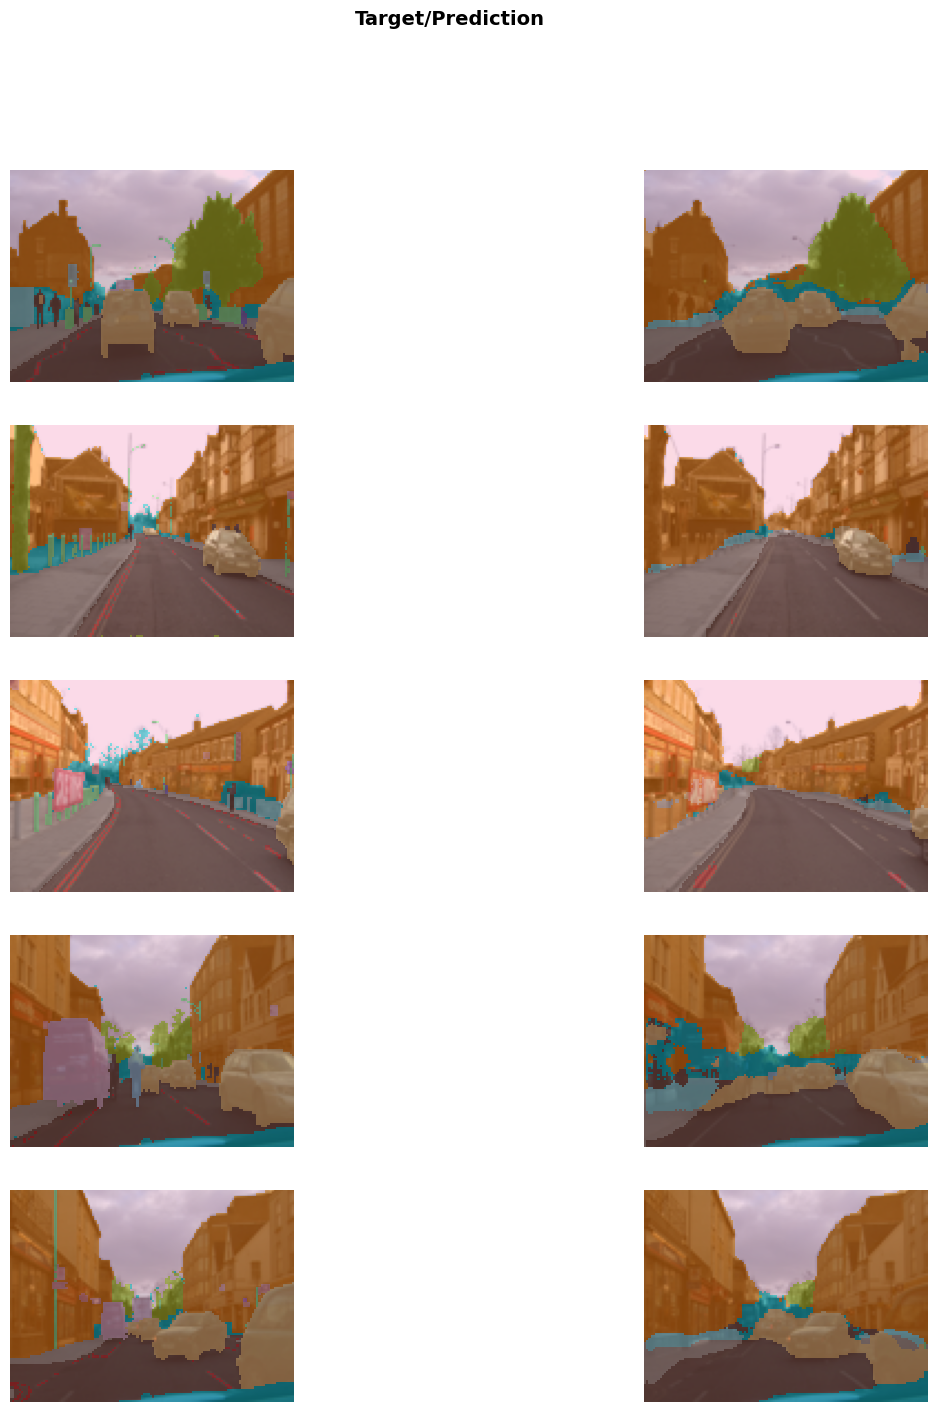

In [ ]:
learn.show_results(max_n=5, figsize=(15, 16))

In [7]:
learn.export('semantic_model.pkl')